##Tratamento de dados

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dados = pd.read_csv('Customer-Churn-Records.csv')
dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
dados.shape

(10000, 18)

In [4]:
#renomeando as colunas
dicionario = {
    'RowNumber':'NumeroLinha',
    'CustomerId':'IdCliente',
    'Surname':'Sobrenome',
    'CreditScore':'HistCredito',
    'Geography':'Localidade',
    'Gender':'Genero',
    'Age':'Idade',
    'Tenure':'TempodeCasa',
    'Balance':'Saldo',
    'NumOfProducts':'NumdeProdutos',
    'HasCrCard':'TemCartaoCredito',
    'IsActiveMember':'ClienteAtivo',
    'EstimatedSalary':'EstimativaSalario',
    'Exited':'Saiu',
    'Complain':'Reclamacao',
    'Satisfaction Score':'ScoreSatisfacao',
    'Card Type':'TipodeCartao',
    'Point Earned':'QtdePontos'
}

dados.rename(columns=dicionario, inplace=True)
dados.head()

,NumeroLinha,IdCliente,Sobrenome,HistCredito,Localidade,Genero,Idade,TempodeCasa,Saldo,NumdeProdutos,TemCartaoCredito,ClienteAtivo,EstimativaSalario,Saiu,Reclamacao,ScoreSatisfacao,TipodeCartao,QtdePontos
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
dados['Genero'].unique()

#substituindo genero por 1 ou 0
genero = {
    'Female':0,
    'Male':1
}

dados['Sexo'] = dados['Genero'].map(genero)

In [6]:
dados.shape

(10000, 19)

In [7]:
dados.drop(columns=['NumeroLinha'], inplace=True)
dados.head()

,IdCliente,Sobrenome,HistCredito,Localidade,Genero,Idade,TempodeCasa,Saldo,NumdeProdutos,TemCartaoCredito,ClienteAtivo,EstimativaSalario,Saiu,Reclamacao,ScoreSatisfacao,TipodeCartao,QtdePontos,Sexo
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,0


In [8]:
dados.corr()

<ipython-input-8-27ee38a39a92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()


,IdCliente,HistCredito,Idade,TempodeCasa,Saldo,NumdeProdutos,TemCartaoCredito,ClienteAtivo,EstimativaSalario,Saiu,Reclamacao,ScoreSatisfacao,QtdePontos,Sexo
IdCliente,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006203,-0.007293,-0.000865,-0.013076,-0.002641
HistCredito,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077,-0.002857
Idade,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222,-0.027544
TempodeCasa,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196,0.014733
Saldo,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608,0.012087
NumdeProdutos,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330,-0.021859
TemCartaoCredito,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041,0.005766
ClienteAtivo,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983,0.022544
EstimativaSalario,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515,-0.008112
Saiu,-0.006203,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628,-0.106267


#Modelo SVC

<Axes: xlabel='Saiu', ylabel='count'>

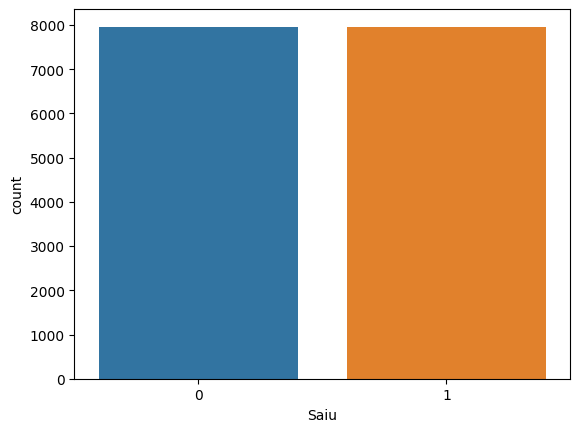

In [9]:
#equilibrando os dados
from imblearn.over_sampling import SMOTE
import numpy as np

y = dados['Saiu']
X = dados.drop(columns=['Saiu', 'TipodeCartao', 'Genero','Sobrenome', 'Localidade','IdCliente','Reclamacao'])

SEED = 123
np.random.seed(SEED)

smt = SMOTE()
X,y = smt.fit_resample(X,y)

df = pd.concat([X,y], axis=1)

#verificando se os dados estão bem distribuidos
sns.countplot(x='Saiu', data=df)

In [10]:
#criando dados de teste e treino
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#normalizando as variaveis X
modelo_ss = StandardScaler()
X_normalizado = modelo_ss.fit_transform(X)

SEED = 2811
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X_normalizado,y,test_size=0.3, stratify=y)

In [11]:
from sklearn.svm import SVC

#X_train_novo, X_test_novo, y_train, y_test
modelo = SVC()
modelo.fit(X_train,y_train)

y_previsto = modelo.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, recall_score

acuracia  = accuracy_score(y_test,y_previsto).round(5) * 100
print('O acuracia do modelo foi de: {}'.format(acuracia))

recall  = recall_score(y_test,y_previsto).round(5) * 100
print('O Recall do modelo foi de: {}'.format(recall))

O acuracia do modelo foi de: 82.901
O Recall do modelo foi de: 81.624


In [13]:
#utilizando a classe dummy, podemos verificar qual se irá mostrar se o nosso modelo não é baseline, #sempre escolher o mais alto
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(X_train, y_train)
previsoes = dummy_stratified.predict(X_test)

acuracia = accuracy_score(y_test, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

recall  = recall_score(y_test,y_previsto).round(5) * 100
print('O recall do modelo foi de: {}'.format(recall))

A acurácia do dummy foi 51.57%
O recall do modelo foi de: 81.624


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix=confusion_matrix(y_test, y_previsto)
print(confusion_matrix)

[[2011  378]
 [ 439 1950]]


#Modelo GaunssianNB

In [15]:
y_2 = dados['Saiu']
X_2 = dados.drop(columns=['Saiu', 'TipodeCartao', 'Genero','Sobrenome', 'Localidade','IdCliente','Reclamacao'])

<Axes: xlabel='Saiu', ylabel='count'>

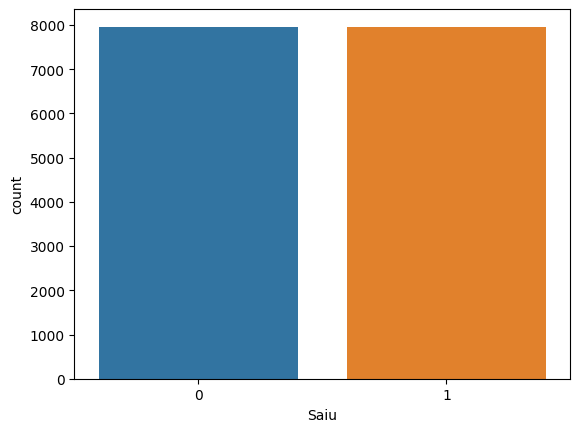

In [16]:
#equilibrando os dados
from imblearn.over_sampling import SMOTE
import numpy as np

y = dados['Saiu']
X = dados.drop(columns=['Saiu', 'TipodeCartao', 'Genero','Sobrenome', 'Localidade','IdCliente','Reclamacao'])

SEED = 123
np.random.seed(SEED)

smt = SMOTE()
X2,y2 = smt.fit_resample(X,y)

df2 = pd.concat([X2,y2], axis=1)

#verificando se os dados estão bem distribuidos
sns.countplot(x='Saiu', data=df2)

In [17]:
#criando dados de teste e treino
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#normalizando as variaveis X
modelo_ss = StandardScaler()
X_normalizado = modelo_ss.fit_transform(X2)

SEED = 2811
np.random.seed(SEED)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_normalizado,y2,test_size=0.3)

In [18]:
from sklearn.naive_bayes import GaussianNB

#X_train_novo, X_test_novo, y_train, y_test
modelo_GNB = GaussianNB()
modelo_GNB.fit(X_train2,y_train2)

y_previsto2 = modelo_GNB.predict(X_test2)

In [19]:
from sklearn.metrics import accuracy_score, recall_score

acuracia  = accuracy_score(y_test2,y_previsto2).round(5) * 100
print('O acuracia do modelo foi de: {}'.format(acuracia))

recall  = recall_score(y_test2,y_previsto2).round(5) * 100
print('O recall do modelo foi de: {}'.format(recall))

O acuracia do modelo foi de: 78.924
O recall do modelo foi de: 78.888


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix=confusion_matrix(y_test2, y_previsto2)
print(confusion_matrix)

[[1884  502]
 [ 505 1887]]


#Modelo RandomForest

In [21]:
dados.head(3)

,IdCliente,Sobrenome,HistCredito,Localidade,Genero,Idade,TempodeCasa,Saldo,NumdeProdutos,TemCartaoCredito,ClienteAtivo,EstimativaSalario,Saiu,Reclamacao,ScoreSatisfacao,TipodeCartao,QtdePontos,Sexo
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,0


In [22]:
#dados_analise = dados.drop(columns = ['IdCliente','Sobrenome','Localidade','Genero'])
dados_analise = dados.drop(columns = ['IdCliente','Sobrenome','Localidade','Genero','TipodeCartao'])
#dados_analise = pd.get_dummies(data=dados_analise,columns=['TipodeCartao'])
dados_analise.head(2)

,HistCredito,Idade,TempodeCasa,Saldo,NumdeProdutos,TemCartaoCredito,ClienteAtivo,EstimativaSalario,Saiu,Reclamacao,ScoreSatisfacao,QtdePontos,Sexo
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0


<Axes: xlabel='Saiu', ylabel='count'>

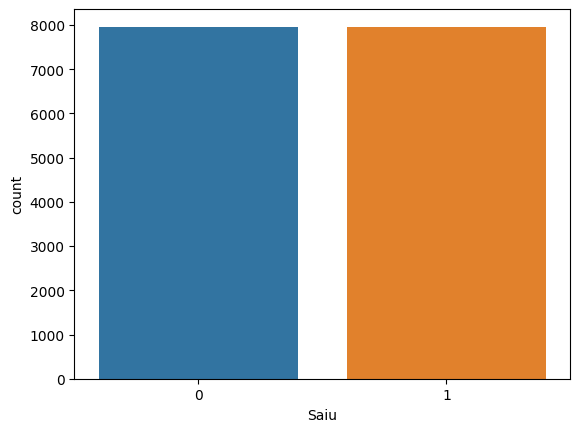

In [23]:
#equilibrando os dados
from imblearn.over_sampling import SMOTE
import numpy as np

y = dados_analise['Saiu']
X = dados_analise.drop(columns=['Saiu'])

SEED = 123
np.random.RandomState(SEED)

smt = SMOTE()
X3,y3 = smt.fit_resample(X,y)

df3 = pd.concat([X3,y3], axis=1)

#verificando se os dados estão bem distribuidos
sns.countplot(x='Saiu', data=df3)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


y = df3['Saiu']
x = df3.drop(columns=['Saiu'])

x_train3, x_test3, y_train3, y_test3 = train_test_split(x,y,test_size=0.3, stratify=y)

SEED = 2811
np.random.seed(SEED)

modelo_RFC = RandomForestClassifier(n_estimators=200,max_depth=4,min_samples_leaf=1020, min_samples_split=512)
modelo_RFC.fit(x_train3,y_train3)
y_predict3 = modelo_RFC.predict(x_test3)


In [25]:
from sklearn.metrics import accuracy_score, recall_score

acuracia  = accuracy_score(y_test3,y_predict3).round(5) * 100
print('O acuracia do modelo foi de: {}'.format(acuracia))

recall  = recall_score(y_test3,y_predict3).round(5) * 100
print('O recall do modelo foi de: {}'.format(recall))

O acuracia do modelo foi de: 99.602
O recall do modelo foi de: 99.288


In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix=confusion_matrix(y_test3,y_predict3)
print(confusion_matrix)

[[2387    2]
 [  17 2372]]


#Modelo RandomizedSearchCV e Cross Validation

In [27]:
dados_analise_2 = dados.drop(columns = ['IdCliente','Sobrenome','Localidade','Genero'])
#dados_analise_2 = dados.drop(columns = ['IdCliente','Sobrenome','Localidade','Genero','TipodeCartao'])
dados_analise_2 = pd.get_dummies(data=dados_analise_2,columns=['TipodeCartao'])
dados_analise_2.head(2)

,HistCredito,Idade,TempodeCasa,Saldo,NumdeProdutos,TemCartaoCredito,ClienteAtivo,EstimativaSalario,Saiu,Reclamacao,ScoreSatisfacao,QtdePontos,Sexo,TipodeCartao_DIAMOND,TipodeCartao_GOLD,TipodeCartao_PLATINUM,TipodeCartao_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0


In [ ]:
y = dados_analise_2['Saiu']
X = dados_analise_2.drop(columns=['Saiu'])

In [72]:
hiperparametros = {
    "max_depth" : [3,4,5],
    "min_samples_split" : [1028,2100,3000],
    "min_samples_leaf" : [1028,1800,2100],
    "criterion" : ["gini", "entropy"],
    'bootstrap': [True, False],
    'n_estimators': [130, 180, 230,300]
}

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

SEED = 123
np.random.seed(SEED)

modelo_RSC = RandomizedSearchCV(
                    estimator=RandomForestClassifier(),
                    param_distributions=hiperparametros,
                    n_iter = 25,
                    cv = KFold(n_splits = 5, shuffle=True) #StratifiedKFold
                              )
modelo_RSC.fit(X,y)
resultados = pd.DataFrame(modelo_RSC.cv_results_)
scores = cross_val_score(modelo_RSC, X,y, cv = KFold(n_splits=5, shuffle=True))

In [74]:
media = scores.mean() * 100
desvio = scores.std() * 100
print("Accuracy médio %.2f" % media)
print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

Accuracy médio 92.27
Intervalo [88.82, 95.72]


In [78]:
modelo_RSC.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       min_samples_leaf=1028, min_samples_split=1028,
                       n_estimators=300)

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

SEED = 2811
np.random.seed(SEED)

cv = StratifiedKFold(n_splits=5,shuffle=True)
modelo_DTC = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1028, min_samples_split=1028)
scores = cross_validate(modelo_DTC, X, y, cv=cv, return_train_score=False)
scores = scores['test_score']

In [90]:
media = scores.mean() * 100
desvio = scores.std() * 100
print("Accuracy médio %.2f" % media)
print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

Accuracy médio 99.86
Intervalo [99.76, 99.96]


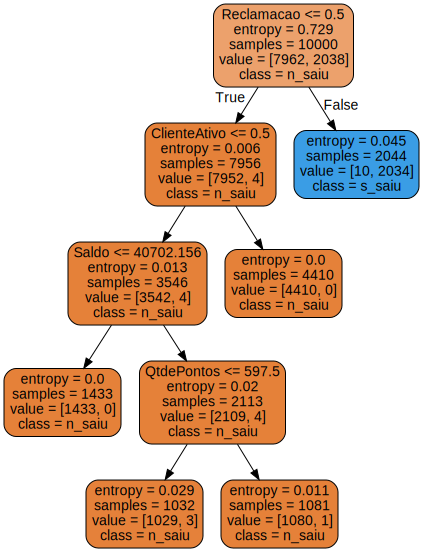

In [93]:
from sklearn.tree import export_graphviz
import graphviz

modelo_DTC.fit(X,y)
dot_data = export_graphviz(modelo_DTC, filled=True, rounded=True, feature_names=X.columns, class_names=['n_saiu','s_saiu'])
grafico = graphviz.Source(dot_data)
grafico

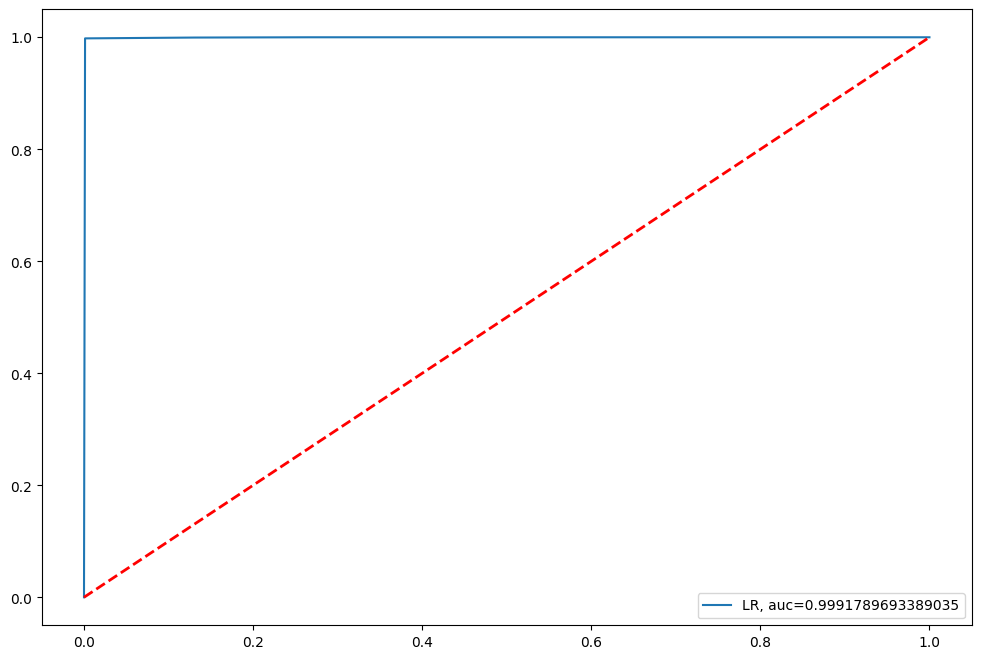

In [101]:
import matplotlib.pyplot as plt

y_pred_proba = modelo_DTC.predict_proba(X)[::, 1]
fpr, tpr, _= roc_curve(y, y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)


plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)